# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [28]:
import numpy as np

def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features (e.g., 784 for a 28x28 image).
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    parameters = {
        "W1": np.random.randn(input_size, hidden_size) * 0.1,
        "b1": np.random.randn(1, hidden_size) * 0.1,
        "W2": np.random.randn(hidden_size, output_size) * 0.1,
        "b2": np.random.randn(1, output_size) * 0.1,
    }
    return parameters



TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [4]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    sigmoid_output = sigmoid(x)
    return sigmoid_output * (1 - sigmoid_output)


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [5]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]

    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache


TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [6]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss


TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [7]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    W1, W2 = parameters["W1"], parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]
    Z1 = cache["Z1"]

    m = X.shape[0]

    dZ2 = A2 - y_true
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients


TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [8]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]
    return parameters


TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [31]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):

        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")


X_train_flatten = x_train.reshape(x_train.shape[0], -1)
X_test_flatten = x_test.reshape(x_test.shape[0], -1)

print("Training with hidden layer size 32")
trained_parameters = train_model(X_train_flatten, y_train, hidden_size=32, epochs=50, learning_rate=0.01)
print()

print("Training with hidden layer size 64")
trained_parameters = train_model(X_train_flatten, y_train, hidden_size=64, epochs=50, learning_rate=0.01)
print()

print("Training with hidden layer size 128")
trained_parameters = train_model(X_train_flatten, y_train, hidden_size=128, epochs=50, learning_rate=0.01)
print()

Training with hidden layer size 32
Epoch 0, Loss: 0.7164
Epoch 10, Loss: 1.0908
Epoch 20, Loss: 1.6466
Epoch 30, Loss: 1.9161
Epoch 40, Loss: 1.9846

Training with hidden layer size 64
Epoch 0, Loss: 0.6825
Epoch 10, Loss: 1.4529
Epoch 20, Loss: 1.7946
Epoch 30, Loss: 1.8498
Epoch 40, Loss: 1.8164

Training with hidden layer size 128
Epoch 0, Loss: 1.0619
Epoch 10, Loss: 1.8785
Epoch 20, Loss: 1.8805
Epoch 30, Loss: 1.7799
Epoch 40, Loss: 1.6737



TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [34]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Dictionary for first moment vector (initialized to zeros).
    - s: Dictionary for second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])
        s[key] = np.zeros_like(parameters[key])
    t = 0
    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1
    updated_parameters = {}

    for key in parameters.keys():
        v[key] = beta1 * v[key] + (1 - beta1) * gradients[f"d{key}"]
        s[key] = beta2 * s[key] + (1 - beta2) * np.square(gradients[f"d{key}"])

        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)

        updated_parameters[key] = parameters[key] - learning_rate * (v_corrected / (np.sqrt(s_corrected) + epsilon))

    return updated_parameters, v, s, t



TODO: Implement Adam optimizer into the training loop.

In [35]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data (shape: number of examples x input size).
    - y_train: One-hot encoded labels (shape: number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
"""
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v, s, t = initialize_adam(parameters)

    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

X_train_flatten = x_train.reshape(x_train.shape[0], -1)
X_test_flatten = x_test.reshape(x_test.shape[0], -1)

print("Training with hidden layer size 32")
trained_parameters = train_model_with_adam(X_train_flatten, y_train, hidden_size=32, epochs=50, learning_rate=0.01)
print()

print("Training with hidden layer size 64")
trained_parameters = train_model_with_adam(X_train_flatten, y_train, hidden_size=64, epochs=50, learning_rate=0.01)
print()

print("Training with hidden layer size 128")
trained_parameters = train_model_with_adam(X_train_flatten, y_train, hidden_size=128, epochs=50, learning_rate=0.01)
print()


Training with hidden layer size 32
Epoch 0, Loss: 0.8157
Epoch 10, Loss: 1.0212
Epoch 20, Loss: 0.9545
Epoch 30, Loss: 0.8432
Epoch 40, Loss: 0.7024

Training with hidden layer size 64
Epoch 0, Loss: 0.7461
Epoch 10, Loss: 1.0887
Epoch 20, Loss: 0.8123
Epoch 30, Loss: 0.6365
Epoch 40, Loss: 0.5911

Training with hidden layer size 128
Epoch 0, Loss: 0.7429
Epoch 10, Loss: 0.9839
Epoch 20, Loss: 0.6620
Epoch 30, Loss: 0.6224
Epoch 40, Loss: 0.5577



### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [36]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Dictionary for second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters.keys():
        s[key] = np.zeros_like(parameters[key])
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    updated_parameters = {}
    for key in parameters.keys():
        s[key] = beta * s[key] + (1 - beta) * np.square(gradients[f"d{key}"])
        updated_parameters[key] = parameters[key] - learning_rate * (gradients[f"d{key}"] / (np.sqrt(s[key]) + epsilon))

    return updated_parameters, s



TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [37]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data (shape: number of examples x input size).
    - y_train: One-hot encoded labels (shape: number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss:({optimizer}) {loss:.4f}")

    return loss_history


TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with Adam optimizer...
Epoch 0, Loss:(adam) 0.8403
Epoch 10, Loss:(adam) 2.0319
Epoch 20, Loss:(adam) 2.0266
Epoch 30, Loss:(adam) 1.3189
Epoch 40, Loss:(adam) 1.0688

Training with RMSprop optimizer...
Epoch 0, Loss:(rmsprop) 0.6499
Epoch 10, Loss:(rmsprop) 1.4817
Epoch 20, Loss:(rmsprop) 1.1485
Epoch 30, Loss:(rmsprop) 0.9711
Epoch 40, Loss:(rmsprop) 0.8461


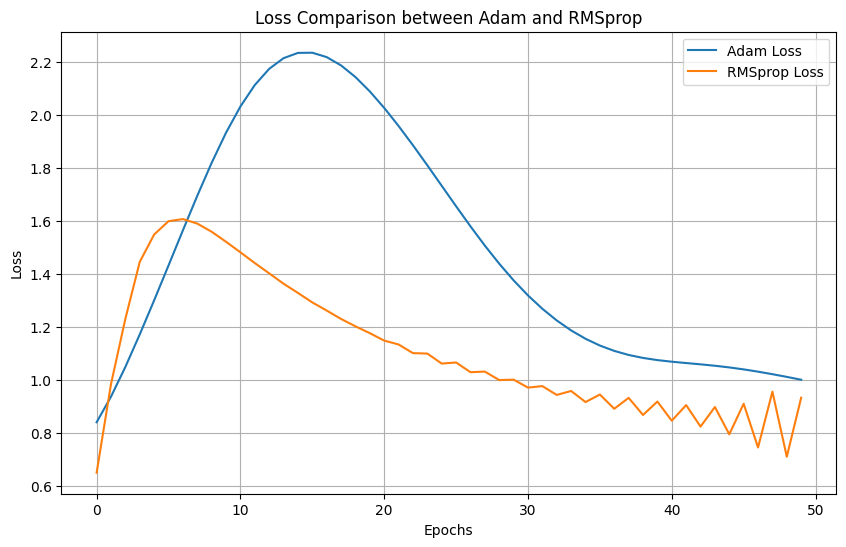

In [43]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers by training the model with both and plotting the loss histories.

    Parameters:
    - X_train: Training data (shape: number of examples x input size).
    - y_train: One-hot encoded labels (shape: number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print("Training with Adam optimizer...")
    adam_loss_history = train_model(X_train, y_train, hidden_size, epochs, optimizer='adam')

    print("\nTraining with RMSprop optimizer...")
    rmsprop_loss_history = train_model(X_train, y_train, hidden_size, epochs, optimizer='rmsprop')

    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), adam_loss_history, label="Adam Loss")
    plt.plot(range(epochs), rmsprop_loss_history, label="RMSprop Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Comparison between Adam and RMSprop")
    plt.legend()
    plt.grid()
    plt.show()


x_train_flatten = x_train.reshape(x_train.shape[0], -1)

compare_optimizers(x_train_flatten, y_train, 64)


## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [44]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Dictionary containing weights and biases.
    - gradients: Calculated gradients for weights and biases.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients[f"d{key}"]
    return parameters


2. Modify the Training Loop


In [45]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using Stochastic Gradient Descent (SGD).

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss (Learning Rate: {learning_rate}): {loss:.4f} ")

    return loss_history


3. Experiment with Different Learning Rates



Training with Learning Rate: 0.001
Epoch 0, Loss (Learning Rate: 0.001): 0.8524 
Epoch 10, Loss (Learning Rate: 0.001): 0.9452 
Epoch 20, Loss (Learning Rate: 0.001): 1.0327 
Epoch 30, Loss (Learning Rate: 0.001): 1.1172 
Epoch 40, Loss (Learning Rate: 0.001): 1.1994 

Training with Learning Rate: 0.01
Epoch 0, Loss (Learning Rate: 0.01): 0.6285 
Epoch 10, Loss (Learning Rate: 0.01): 1.5433 
Epoch 20, Loss (Learning Rate: 0.01): 1.8378 
Epoch 30, Loss (Learning Rate: 0.01): 1.8705 
Epoch 40, Loss (Learning Rate: 0.01): 1.8309 

Training with Learning Rate: 0.1
Epoch 0, Loss (Learning Rate: 0.1): 0.8421 
Epoch 10, Loss (Learning Rate: 0.1): 1.5042 
Epoch 20, Loss (Learning Rate: 0.1): 1.1576 
Epoch 30, Loss (Learning Rate: 0.1): 1.0210 
Epoch 40, Loss (Learning Rate: 0.1): 0.9451 


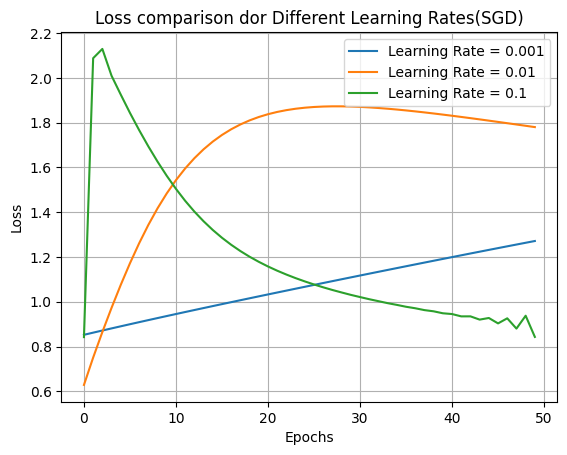

In [47]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.

    Returns:
    - loss_histories: Dictionary where keys are learning rates and values are corresponding loss histories.
    """
    loss_histories = {}

    for lr in learning_rates:
        print(f"\nTraining with Learning Rate: {lr}")
        loss_histories[lr] = train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate=lr)

    for lr, loss_history in loss_histories.items():
        plt.plot(range(epochs), loss_history, label=f"Learning Rate = {lr}")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss comparison dor Different Learning Rates(SGD)")
    plt.legend()
    plt.grid()
    plt.show()

x_train_flatten = x_train.reshape(x_train.shape[0], -1)

compare_learning_rates(x_train_flatten,y_train,64)


### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [51]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variables, initialized to zeros.
    """
    v = {}
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])
    return v


def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Dictionary of weights and biases.
    - gradients: Calculated gradients for weights and biases.
    - v: Momentum variables.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated parameters (weights and biases).
    - v: Updated momentum variables.
    """
    updated_parameters = {}
    for key in parameters.keys():
        v[key] = beta * v[key] + (1 - beta) * gradients[f"d{key}"]
        updated_parameters[key] = parameters[key] - learning_rate * v[key]

    return updated_parameters, v



3. Modify the Training Loop


In [49]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data (number of examples x input size).
    - y_train: One-hot encoded labels (number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    if optimizer == 'momentum':
        v = initialize_momentum(parameters)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        elif optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss ({optimizer}): {loss:.4f} ")

    return loss_history


4. Train the Model with Both Optimizers


Training with Classic SGD...
Epoch 0, Loss (sgd): 0.9534 
Epoch 10, Loss (sgd): 1.6791 
Epoch 20, Loss (sgd): 1.8832 
Epoch 30, Loss (sgd): 1.8844 
Epoch 40, Loss (sgd): 1.8280 

Training with SGD with Momentum...
Epoch 0, Loss (momentum): 0.7660 
Epoch 10, Loss (momentum): 1.1755 
Epoch 20, Loss (momentum): 1.9796 
Epoch 30, Loss (momentum): 2.3651 
Epoch 40, Loss (momentum): 2.2103 


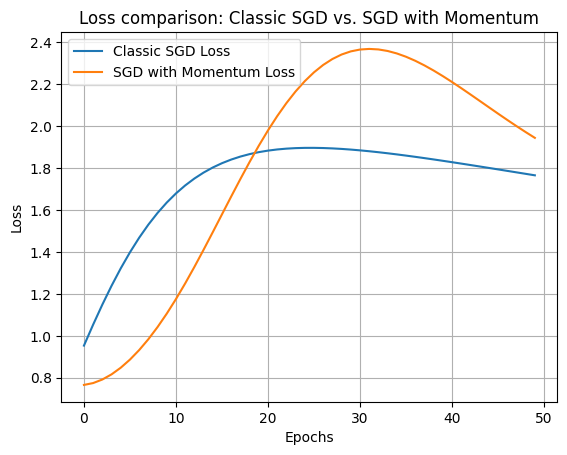

In [50]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data (number of examples x input size).
    - y_train: One-hot encoded labels (number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print("Training with Classic SGD...")
    sgd_loss_history = train_model(X_train, y_train, hidden_size, epochs, optimizer='sgd')

    print("\nTraining with SGD with Momentum...")
    momentum_loss_history = train_model(X_train, y_train, hidden_size, epochs, optimizer='momentum')

    plt.plot(range(epochs), sgd_loss_history, label="Classic SGD Loss")
    plt.plot(range(epochs), momentum_loss_history, label="SGD with Momentum Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss comparison: Classic SGD vs. SGD with Momentum")
    plt.legend()
    plt.grid()
    plt.show()

x_train_flatten = x_train.reshape(x_train.shape[0], -1)

compare_sgd_and_momentum(x_train_flatten,y_train,64)


## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [52]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data (number of examples x input size).
    - y_train: One-hot encoded labels (number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []

    num_batches = X_train.shape[0] // batch_size

    for epoch in range(epochs):
        epoch_loss = 0
        epoch_correct = 0

        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for i in range(num_batches):
            start = i * batch_size
            end = start + batch_size
            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            A2, cache = forward_propagation(X_batch, parameters)

            loss = compute_loss(y_batch, A2)
            epoch_loss += loss

            gradients = backward_propagation(X_batch, y_batch, parameters, cache)

            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

            predictions = np.argmax(A2, axis=1)
            labels = np.argmax(y_batch, axis=1)
            epoch_correct += np.sum(predictions == labels)

        epoch_loss /= num_batches
        epoch_accuracy = epoch_correct / X_train.shape[0]
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    print(f"Final Loss for batch size {batch_size}: {loss_history[-1]:.4f}")
    print(f"Final Accuracy for batch size {batch_size}: {accuracy_history[-1]:.4f}\n")

    return loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes


In [53]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data (number of examples x input size).
    - y_train: One-hot encoded labels (number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.

    Returns:
    - results: Dictionary containing loss and accuracy histories for each batch size.
    """
    results = {}

    for batch_size in batch_sizes:
        print(f"\nTraining with mini-batch size: {batch_size}")
        loss_history, accuracy_history = train_model_with_mini_batches(
            X_train, y_train, hidden_size, epochs, batch_size=batch_size
        )
        results[batch_size] = {
            "loss_history": loss_history,
            "accuracy_history": accuracy_history,
        }

x_train_flatten = x_train.reshape(x_train.shape[0], -1)

compare_mini_batch_sizes(x_train_flatten,y_train,64)


Training with mini-batch size: 16
Epoch 0, Loss: 0.7253, Accuracy: 0.7543
Epoch 10, Loss: 0.3586, Accuracy: 0.8787
Epoch 20, Loss: 0.3119, Accuracy: 0.8939
Epoch 30, Loss: 0.2843, Accuracy: 0.9030
Epoch 40, Loss: 0.2641, Accuracy: 0.9102
Final Loss for batch size 16: 0.2499
Final Accuracy for batch size 16: 0.9160


Training with mini-batch size: 32
Epoch 0, Loss: 0.8637, Accuracy: 0.7030
Epoch 10, Loss: 0.4090, Accuracy: 0.8658
Epoch 20, Loss: 0.3570, Accuracy: 0.8823
Epoch 30, Loss: 0.3278, Accuracy: 0.8919
Epoch 40, Loss: 0.3058, Accuracy: 0.8988
Final Loss for batch size 32: 0.2906
Final Accuracy for batch size 32: 0.9035


Training with mini-batch size: 64
Epoch 0, Loss: 0.9929, Accuracy: 0.6697
Epoch 10, Loss: 0.4574, Accuracy: 0.8493
Epoch 20, Loss: 0.4033, Accuracy: 0.8668
Epoch 30, Loss: 0.3738, Accuracy: 0.8756
Epoch 40, Loss: 0.3531, Accuracy: 0.8827
Final Loss for batch size 64: 0.3383
Final Accuracy for batch size 64: 0.8865



### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [62]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        predictions = np.argmax(A2, axis=1)
        true_labels = np.argmax(y_train, axis=1)
        accuracy = np.mean(predictions == true_labels)
        accuracy_history.append(accuracy)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss (Full-Batch): {loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history


In [71]:
import time

def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data (number of examples x input size).
    - y_train: One-hot encoded labels (number of examples x output size).
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    print("Training with Mini-Batch Gradient Descent...")
    start_time = time.time()
    mini_batch_loss, mini_batch_accuracy = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)
    mini_batch_time = time.time() - start_time

    print("Training with Full-Batch Gradient Descent...")
    start_time = time.time()
    full_batch_loss, full_batch_accuracy = train_model_full_batch(X_train, y_train, hidden_size, epochs)
    full_batch_time = time.time() - start_time

    print(f"\nMini-Batch Final Loss: {mini_batch_loss[-1]:.4f}, Final Accuracy: {mini_batch_accuracy[-1]:.4f}, Time: {mini_batch_time:.2f} seconds")
    print(f"Full-Batch Final Loss: {full_batch_loss[-1]:.4f}, Final Accuracy: {full_batch_accuracy[-1]:.4f}, Time: {full_batch_time:.2f} seconds")
compare_mini_batch_and_full_batch(x_train_flatten, y_train, hidden_size=64, epochs=50, batch_size=32)


Training with Mini-Batch Gradient Descent...
Epoch 0, Loss: 0.8509, Accuracy: 0.7073
Epoch 10, Loss: 0.4060, Accuracy: 0.8643
Epoch 20, Loss: 0.3564, Accuracy: 0.8815
Epoch 30, Loss: 0.3276, Accuracy: 0.8902
Epoch 40, Loss: 0.3062, Accuracy: 0.8980
Final Loss for batch size 32: 0.2906
Final Accuracy for batch size 32: 0.9035

Training with Full-Batch Gradient Descent...
Epoch 0, Loss (Full-Batch): 0.7985, Accuracy: 0.0572
Epoch 10, Loss (Full-Batch): 1.6484, Accuracy: 0.1324
Epoch 20, Loss (Full-Batch): 1.8980, Accuracy: 0.2004
Epoch 30, Loss (Full-Batch): 1.9084, Accuracy: 0.2959
Epoch 40, Loss (Full-Batch): 1.8525, Accuracy: 0.3734

Mini-Batch Final Loss: 0.2906, Final Accuracy: 0.9035, Time: 113.63 seconds
Full-Batch Final Loss: 1.7890, Final Accuracy: 0.4266, Time: 50.01 seconds
